In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from time import time

In [53]:
import pandas as pd
import numpy as np

In [54]:
df=pd.read_csv('data(1).csv')

In [55]:
df.head()
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [56]:
df = df.drop(['Unnamed: 32','id'],axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [58]:
df.diagnosis.unique()


array(['M', 'B'], dtype=object)

In [59]:
df[['radius_mean','radius_se','radius_worst']]

,radius_mean,radius_se,radius_worst
0,17.99,1.0950,25.380
1,20.57,0.5435,24.990
2,19.69,0.7456,23.570
3,11.42,0.4956,14.910
4,20.29,0.7572,22.540
...,...,...,...
564,21.56,1.1760,25.450
565,20.13,0.7655,23.690
566,16.60,0.4564,18.980
567,20.60,0.7260,25.740


In [60]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [61]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [62]:
#Binary encoding of the diagnosis column using label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.diagnosis=le.fit_transform(df.diagnosis)
df.head()
df.to_csv('clean_data.csv')

In [63]:
df=pd.read_csv('clean_data.csv')

In [64]:
df = df.drop(['Unnamed: 0'],axis=1)

<Axes: >

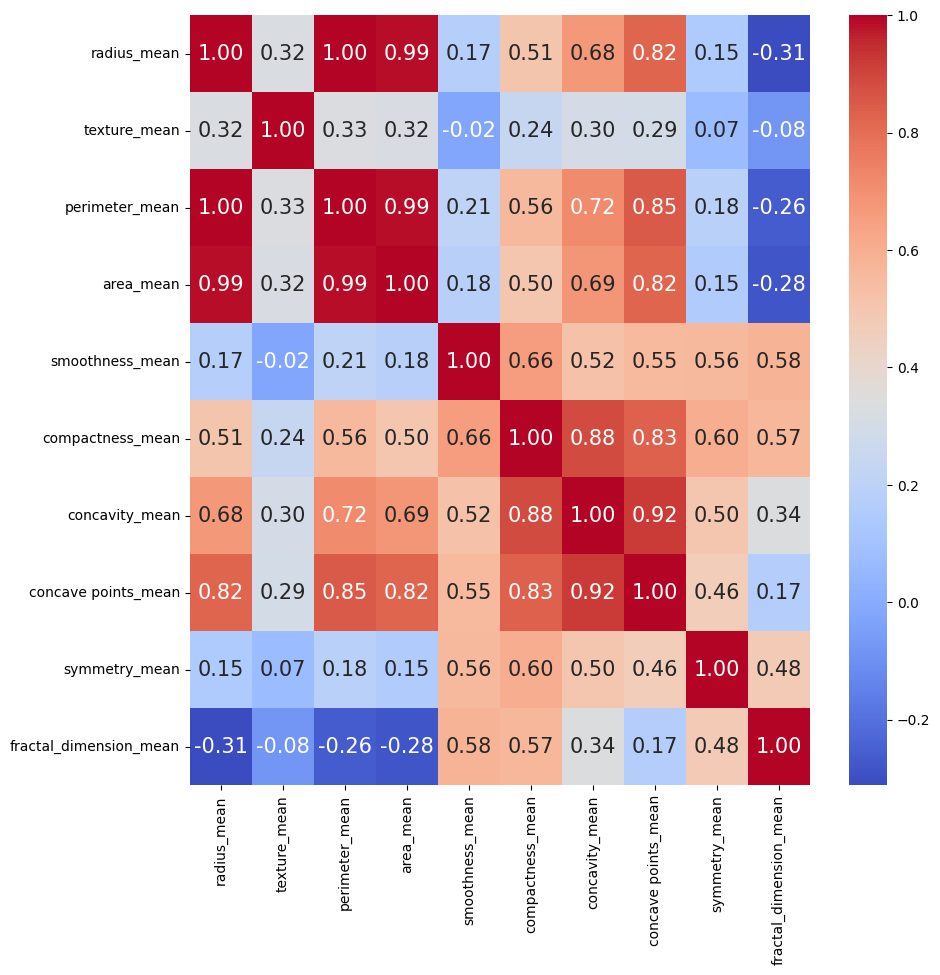

In [65]:
corr_matrix = df[features_mean].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar = True,  annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [66]:
df = df.drop(['perimeter_mean','perimeter_se','perimeter_worst','area_mean','area_se','area_worst','concavity_mean','concavity_se','concavity_worst','concave points_mean','concave points_se','concave points_worst'],axis=1)

In [67]:
#y is the dependent variable 
#X is the feature columns
#Taking 30% of the data out for testing

from sklearn.model_selection import train_test_split

y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 18), (398,), (171, 18), (171,))

In [68]:
#Feature Standardization 
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)


In [93]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_test, y_test, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

print(len(scores))

11


In [70]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)


,Model,Score
0,AdaBoost,0.965033
1,XGBoost,0.959477
2,Logistic Regression,0.959150
3,Extra Trees,0.959150
4,Random Forest,0.947712
5,K Nearest Neighbour,0.941503
6,Gradient Boosting,0.941503
7,SVC,0.941503
8,Gaussian Process,0.941503
9,Bagging Classifier,0.924183


(0.93, 0.97)

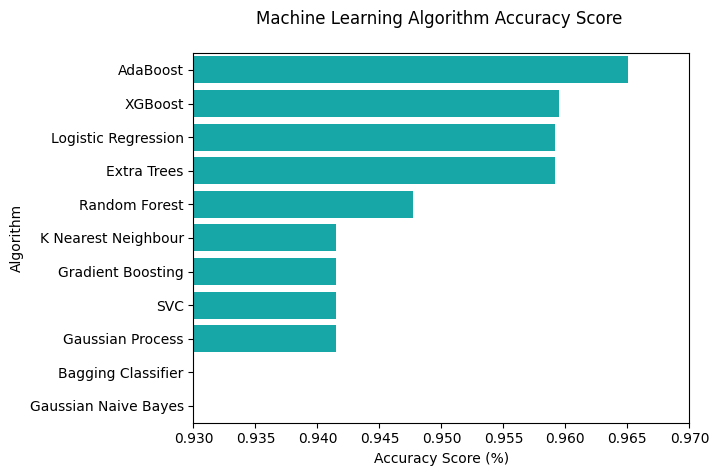

In [71]:
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.93,0.97)

# Optimizing Classifiers


In [72]:
models=[]

In [73]:
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': Cs, 'gamma' : gammas}

# Run GridSearch CV
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.9699367088607594
SVC(C=15, gamma=0.001, probability=True)


In [74]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9674050632911392
LogisticRegression(C=2.7825594022071245)


In [75]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.9498734177215189
KNeighborsClassifier(leaf_size=1, n_neighbors=8)


In [76]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
0.954873417721519
GradientBoostingClassifier(learning_rate=0.2, n_estimators=1500)


In [77]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]
gamma = [i*0.1 for i in range(0,5)]
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
reg_alpha = [1e-5, 1e-2,0, 0.1, 1, 100] 
# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators,'gamma': gamma,'subsample': subsample, 'colsample_bytree': colsample_bytree,'reg_alpha': reg_alpha}

# Run GridSearch CV
gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 174960 candidates, totalling 874800 fits


KeyboardInterrupt: 

In [78]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

# Setting up parameter grid
hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

# Run GridSearch CV
gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

models.append(gd.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.9398417721518987
GaussianProcessClassifier(max_iter_predict=1, warm_start=True)


In [79]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Run GridSearch CV
gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
0.9548101265822785
AdaBoostClassifier(learning_rate=0.1, n_estimators=200)


In [80]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.9498734177215189
KNeighborsClassifier(leaf_size=1, n_neighbors=8)


In [81]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.9674683544303797
RandomForestClassifier(max_features=1, min_samples_leaf=2, min_samples_split=10)


In [82]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.9674683544303797
ExtraTreesClassifier(max_features=5, min_samples_leaf=2)


In [83]:
# Parameter's to search
n_estimators = [10, 15, 20, 25, 50, 75, 100, 150]
max_samples = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 50]
max_features = [1, 3, 5, 7]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

# Run GridSearch CV
gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
models.append(gd.best_estimator_)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits
0.9523417721518987
BaggingClassifier(max_features=3, max_samples=50, n_estimators=100)


[SVC(C=15, gamma=0.001, probability=True), LogisticRegression(C=2.7825594022071245), KNeighborsClassifier(leaf_size=1, n_neighbors=8), GradientBoostingClassifier(learning_rate=0.2, n_estimators=1500), GaussianProcessClassifier(max_iter_predict=1, warm_start=True), AdaBoostClassifier(learning_rate=0.1, n_estimators=200), KNeighborsClassifier(leaf_size=1, n_neighbors=8), RandomForestClassifier(max_features=1, min_samples_leaf=2, min_samples_split=10), ExtraTreesClassifier(max_features=5, min_samples_leaf=2), BaggingClassifier(max_features=3, max_samples=50, n_estimators=100)]


In [96]:
scores_v3 = []

for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_test, y_test, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())
 

In [97]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score with tuned parameters
0,Extra Trees,0.965033
1,AdaBoost,0.965033
2,XGBoost,0.959477
3,Logistic Regression,0.959150
4,Random Forest,0.947712
5,Bagging Classifier,0.947712
6,K Nearest Neighbour,0.941503
7,SVC,0.941503
8,Gaussian Process,0.941503
9,Gradient Boosting,0.935948


In [100]:
print(models)

[RandomForestClassifier(random_state=1), KNeighborsClassifier(), LogisticRegression(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), GradientBoostingClassifier(), SVC(probability=True), ExtraTreesClassifier(), AdaBoostClassifier(), GaussianNB(), GaussianProcessClassifier(), BaggingClassifier(

In [104]:
from sklearn.metrics import confusion_matrix
grid_hard = VotingClassifier(estimators = [('svc',SVC(C=15, gamma=0.001, probability=True)), ('logreg',LogisticRegression(C=2.7825594022071245)), ('knn',KNeighborsClassifier(leaf_size=1, n_neighbors=8)), ('gbc',GradientBoostingClassifier(learning_rate=0.2, n_estimators=1500)), ('gpc',GaussianProcessClassifier(max_iter_predict=1, warm_start=True)),('ada', AdaBoostClassifier(learning_rate=0.1, n_estimators=200)), ('knn',KNeighborsClassifier(leaf_size=1, n_neighbors=8)), ('ran',RandomForestClassifier(max_features=1, min_samples_leaf=2, min_samples_split=10)),('ext', ExtraTreesClassifier(max_features=5, min_samples_leaf=2)),('bag', BaggingClassifier(max_features=3, max_samples=50, n_estimators=100))]
, voting = 'hard')
grid_hard.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , grid_hard.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , grid_hard.score(X_test, y_test))

y_pred = grid_hard.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
# print the report
print(report)


ValueError: Names provided are not unique: ['svc', 'logreg', 'knn', 'gbc', 'gpc', 'ada', 'knn', 'ran', 'ext', 'bag']

In [ ]:
sns.heatmap(CM, center = True)
plt.show()

In [ ]:
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.metrics import confusion_matrix
grid_soft = VotingClassifier(estimators = [('Logistic Regression',LogisticRegression(C=2.7825594022071245)),
                                           ('Extra Trees', ExtraTreesClassifier(max_features=3, min_samples_leaf=2)),
                                           ('SVC', SVC(C=15, gamma=0.001, probability=True))], voting = 'hard')
grid_soft.fit(X_train, y_train)

print('VotingClassifierModel Train Score is : ' , grid_soft.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , grid_soft.score(X_test, y_test))

y_pred = grid_soft.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
# print the report
print(report)

In [ ]:
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')